Iteration 0: [0. 0. 0.] Err: 1.392857 Rel Err: 1.000000 Time: 0.000081
Iteration 1: [ 0.75        1.5        -0.85714286] Err: 0.446429 Rel Err: 0.242718 Time: 0.001291
Iteration 2: [ 0.91071429  1.89285714 -0.96428571] Err: 0.109694 Rel Err: 0.056283 Time: 0.001953
Iteration 3: [ 0.98214286  1.96428571 -0.99744898] Err: 0.038903 Rel Err: 0.019570 Time: 0.002550
Iteration 4: [ 0.99170918  1.99362245 -0.99744898] Err: 0.007699 Rel Err: 0.003858 Time: 0.003162
Iteration 5: [ 0.99904337  1.99681122 -1.00027332] Err: 0.003599 Rel Err: 0.001800 Time: 0.003730
Iteration 6: [ 0.99913448  1.99972668 -0.99968112] Err: 0.000405 Rel Err: 0.000203 Time: 0.004317
Iteration 7: [ 1.00001139  1.99965835 -1.0000846 ] Err: 0.000377 Rel Err: 0.000188 Time: 0.004859
Iteration 8: [ 0.99989344  2.0000179  -0.99994957] Err: 0.000006 Rel Err: 0.000003 Time: 0.005432
Iteration 9: [ 1.00001708  1.99995607 -1.00001778] Err: 0.000047 Rel Err: 0.000023 Time: 0.005993
Iteration 10: [ 0.99998457  2.00000866 -0.99999

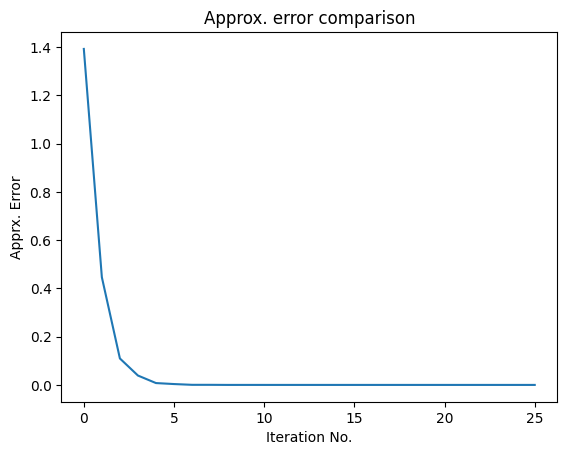

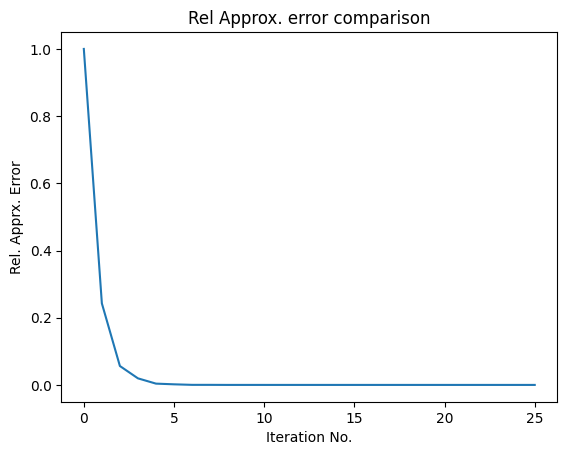

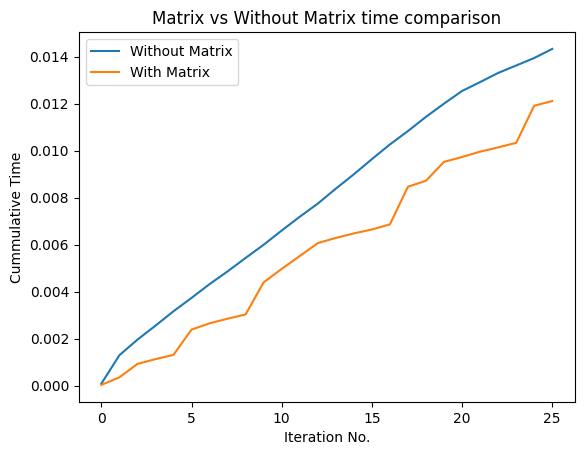

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time

ITERATION_LIMIT = 30
TOLERANCE = 1e-10

i_vals = []
err_vals = []
re_vals = []
time_vals1 = []
time_vals2 = []

A = np.array(
    [
        [4, -1, -1],
        [-2, 6, 1],
        [-1, 1, 7],
    ]
)

b = np.array([3, 9, -6])


def linear():
    n = len(b)
    x = np.zeros(n)

    start = time.time()

    for it_count in range(ITERATION_LIMIT):
        x_new = np.zeros(n)

        for i in range(n):
            s = 0.0
            for j in range(n):
                if j != i:
                    s += A[i, j] * x[j]
            x_new[i] = (b[i] - s) / A[i, i]

        sm1 = np.sum(x)
        sm2 = np.sum(x_new)

        err = abs(sm2 - sm1)
        re = err / sm2

        current = time.time() - start

        err_vals.append(err)
        re_vals.append(re)
        time_vals1.append(current)
        i_vals.append(it_count)

        print(
            f"Iteration {it_count}: {x} Err: {err:.6f} Rel Err: {re:.6f} Time: {current:.6f}"
        )

        if np.linalg.norm(x_new - x) < TOLERANCE:
            break

        x = x_new.copy()


def matrix():
    n = len(b)
    x = np.zeros(n)

    D = np.diag(A)
    L = np.tril(A, k=-1)
    U = np.triu(A, k=1)

    D_inv = np.diag(1.0 / D)

    start = time.time()

    for it_count in range(ITERATION_LIMIT):
        x_new = np.dot(D_inv, -np.dot(L + U, x) + b)

        sm1 = np.sum(x)
        sm2 = np.sum(x_new)

        err = abs(sm2 - sm1)
        re = err / sm2

        current = time.time() - start

        time_vals2.append(current)

        print(
            f"Iteration {it_count}: {x} Err: {err:.6f} Rel Err: {re:.6f} Time: {current:.6f}"
        )

        if np.linalg.norm(x_new - x) < TOLERANCE:
            break

        x = x_new.copy()


if __name__ == "__main__":
    linear()
    matrix()

    plt.plot(i_vals, err_vals)
    plt.xlabel("Iteration No.")
    plt.ylabel("Apprx. Error")
    plt.title("Approx. error comparison")
    plt.show()

    plt.plot(i_vals, re_vals)
    plt.xlabel("Iteration No.")
    plt.ylabel("Rel. Apprx. Error")
    plt.title("Rel Approx. error comparison")
    plt.show()

    plt.plot(i_vals, time_vals1, label="Without Matrix")
    plt.plot(i_vals, time_vals2, label="With Matrix")
    plt.xlabel("Iteration No.")
    plt.ylabel("Cummulative Time")
    plt.title("Matrix vs Without Matrix time comparison")
    plt.legend()
    plt.show()
